<a href="https://colab.research.google.com/github/andromeda313/Toshkent-uylari-narxlari-bashorati/blob/main/Tash_house_price_ipynb%22.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

![Imgur](https://i.imgur.com/5pXzCIu.png)

# Data Science va Sun'iy Intellekt Praktikum

## 5-MODUL. Machine Learning

### Portfolio uchun vazifa: Toshkent shahrida uylarning narxini aniqlash.

Ushbu amaliyotda sizning vazifangiz berilgan ma`lumotlar asosida Toshkent shahridagi uylarning narxini aniqlash.

#Kirish

In [393]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [394]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sbn

#DataSet ni yuklab olamiz

In [395]:


df = pd.read_csv('/content/drive/MyDrive/ANDROMEDA_Drive/RepeateDataScience/ML/housing_data_08-02-2021.csv')
df.head()

,location,district,rooms,size,level,max_levels,price
0,"город Ташкент, Юнусабадский район, Юнусабад 8-...",Юнусабадский,3,57,4,4,52000
1,"город Ташкент, Яккасарайский район, 1-й тупик ...",Яккасарайский,2,52,4,5,56000
2,"город Ташкент, Чиланзарский район, Чиланзар 2-...",Чиланзарский,2,42,4,4,37000
3,"город Ташкент, Чиланзарский район, Чиланзар 9-...",Чиланзарский,3,65,1,4,49500
4,"город Ташкент, Чиланзарский район, площадь Актепа",Чиланзарский,3,70,3,5,55000


# Ustunlar ta'rifi
- `location` - sotilayotgan uy manzili
- `district` - uy joylashgan tuman
- `rooms` - xonalar soni
- `size` - uy maydoni (kv.m)
- `level` - uy joylashgan qavat
- `max_levels` - ja'mi qavatlar soni
- `price` - uy narxi

## Vazifani CRSIP-DM Metolodgiyasi yordamida bajaring.
<img src="https://i.imgur.com/dzZnnYi.png" alt="CRISP-DM" width="800"/>

In [396]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7565 entries, 0 to 7564
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   location    7565 non-null   object
 1   district    7565 non-null   object
 2   rooms       7565 non-null   int64 
 3   size        7565 non-null   object
 4   level       7565 non-null   int64 
 5   max_levels  7565 non-null   int64 
 6   price       7565 non-null   object
dtypes: int64(3), object(4)
memory usage: 413.8+ KB


In [397]:
#Duplicat qiymatlar bilan ishlash
df.duplicated().sum()

700

In [398]:
df.drop_duplicates(inplace=True)

#Notugri tuldirilgan qiymatlarni tuldiramiz

In [399]:
#Договорная qiymatlarni tuldiramiz
df[df.price=='Договорная'].shape

(96, 7)

In [400]:
df.replace({'Договорная':np.nan},inplace=True)

In [401]:
#Ustun tipin object dan float ga uzgartiramiz
df = df.astype({'price':np.float32})

In [402]:
#size ustunida bazi qiymatlar 
#Площадьземли:1сот deb ketilgan
df[df['size']=='Площадьземли:1сот']

,location,district,rooms,size,level,max_levels,price
5347,"город Ташкент, Яшнободский район, Дархон",Яшнободский,4,Площадьземли:1сот,3,5,150000.0


In [403]:
df.replace({'Площадьземли:1сот':100}, inplace = True)

In [404]:
#Ustun tipini object dan float ga uzgartiramiz
df = df.astype({'size':np.float32})

In [405]:
#tekshiramiz
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6865 entries, 0 to 7564
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   location    6865 non-null   object 
 1   district    6865 non-null   object 
 2   rooms       6865 non-null   int64  
 3   size        6865 non-null   float32
 4   level       6865 non-null   int64  
 5   max_levels  6865 non-null   int64  
 6   price       6769 non-null   float32
dtypes: float32(2), int64(3), object(2)
memory usage: 375.4+ KB


In [406]:
#price ustunidagi NaN qiymatlar ustida ishlaymiz
df2 = df.dropna()

In [407]:
df.groupby(by=['district', 'rooms']).price.mean()

district      rooms
Бектемирский  1         19000.000000
              2         26100.000000
              3         30120.000000
              4         40000.000000
Мирабадский   1         44508.164062
                           ...      
Яшнободский   3         58879.945312
              4        198112.640625
              5         86889.898438
              6        176000.000000
              7        300000.000000
Name: price, Length: 81, dtype: float32

In [408]:
df.describe()

,rooms,size,level,max_levels,price
count,6865.000000,6865.000000,6865.000000,6865.000000,6.769000e+03
mean,2.626948,117.468773,3.712163,6.056082,7.272632e+04
std,1.077532,1565.293213,2.256086,2.626281,6.724414e+05
min,1.000000,1.000000,1.000000,1.000000,2.000000e+00
25%,2.000000,50.000000,2.000000,4.000000,3.500000e+04
50%,3.000000,67.000000,3.000000,5.000000,4.650000e+04
75%,3.000000,86.000000,5.000000,9.000000,6.700000e+04
max,10.000000,70000.000000,19.000000,25.000000,5.200000e+07


In [409]:
df.median()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  """Entry point for launching an IPython kernel.


rooms             3.0
size             67.0
level             3.0
max_levels        5.0
price         46500.0
dtype: float64

In [410]:
df.mean()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  """Entry point for launching an IPython kernel.


rooms             2.626948
size            117.468773
level             3.712163
max_levels        6.056082
price         72726.320312
dtype: float64

In [411]:
#xona ulchamlari noodatiy qiymatlarni tashlab yuboramiz 6865
df = df[ ((df['size']>10)& 
          (df['size']<250))]

df = df[ ((df['price']>500) & 
          (df['price']<200_000))]

#DataSet ni saqlab qo'yamiz

In [412]:
df.to_csv("/content/drive/MyDrive/ANDROMEDA_Drive/RepeateDataScience/ML/Tash_house_ready.csv", index=False)

#Yuklab olib tekshiramiz

In [413]:
df = pd.read_csv('/content/drive/MyDrive/ANDROMEDA_Drive/RepeateDataScience/ML/Tash_house_ready.csv')
df.head()

,location,district,rooms,size,level,max_levels,price
0,"город Ташкент, Юнусабадский район, Юнусабад 8-...",Юнусабадский,3,57.0,4,4,52000.0
1,"город Ташкент, Яккасарайский район, 1-й тупик ...",Яккасарайский,2,52.0,4,5,56000.0
2,"город Ташкент, Чиланзарский район, Чиланзар 2-...",Чиланзарский,2,42.0,4,4,37000.0
3,"город Ташкент, Чиланзарский район, Чиланзар 9-...",Чиланзарский,3,65.0,1,4,49500.0
4,"город Ташкент, Чиланзарский район, площадь Актепа",Чиланзарский,3,70.0,3,5,55000.0


In [414]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6585 entries, 0 to 6584
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   location    6585 non-null   object 
 1   district    6585 non-null   object 
 2   rooms       6585 non-null   int64  
 3   size        6585 non-null   float64
 4   level       6585 non-null   int64  
 5   max_levels  6585 non-null   int64  
 6   price       6585 non-null   float64
dtypes: float64(2), int64(3), object(2)
memory usage: 360.2+ KB


In [415]:
df.describe()

,rooms,size,level,max_levels,price
count,6585.000000,6585.000000,6585.000000,6585.000000,6585.000000
mean,2.578891,70.166838,3.705543,6.018071,54218.549431
std,1.028251,28.926646,2.254267,2.609883,29339.519137
min,1.000000,11.000000,1.000000,1.000000,1000.000000
25%,2.000000,50.000000,2.000000,4.000000,35000.000000
50%,2.000000,65.000000,3.000000,5.000000,46000.000000
75%,3.000000,83.000000,5.000000,9.000000,65000.000000
max,8.000000,246.000000,19.000000,25.000000,198000.000000


#Vizualizatsiya

In [416]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6585 entries, 0 to 6584
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   location    6585 non-null   object 
 1   district    6585 non-null   object 
 2   rooms       6585 non-null   int64  
 3   size        6585 non-null   float64
 4   level       6585 non-null   int64  
 5   max_levels  6585 non-null   int64  
 6   price       6585 non-null   float64
dtypes: float64(2), int64(3), object(2)
memory usage: 360.2+ KB


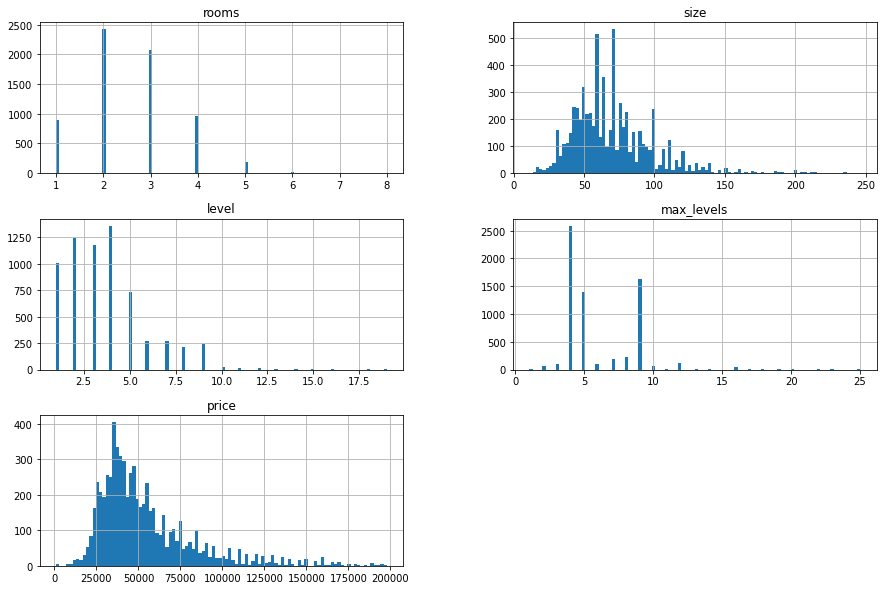

In [417]:
df.hist(bins=100,figsize=(15,10))
plt.show()

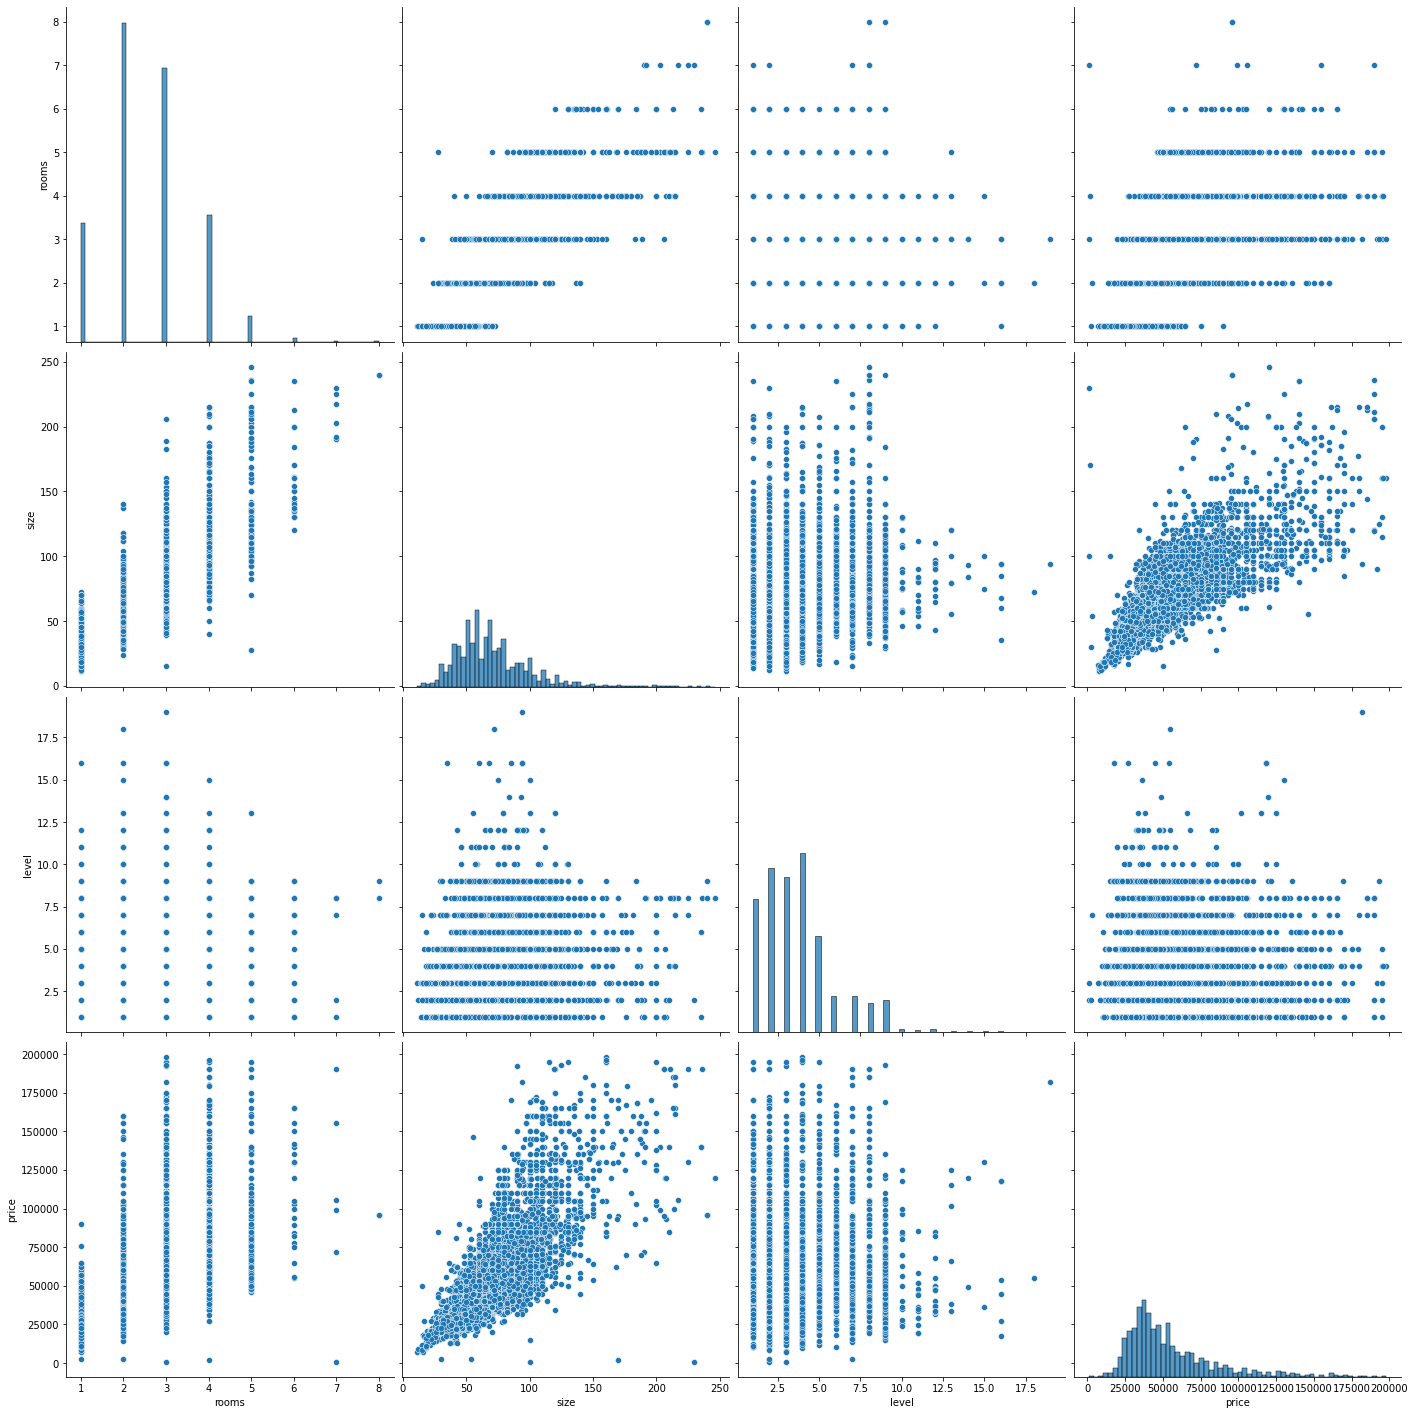

In [418]:
cols = ['rooms', 'size', 'level', 'price']
sbn.pairplot(data=df[cols],height=5)
plt.show()

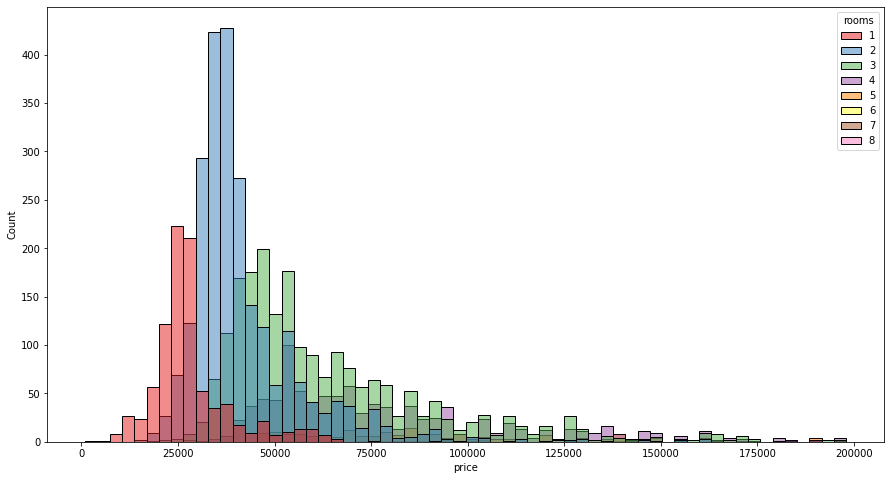

In [419]:

plt.figure(figsize=(15,8))
sbn.histplot(data=df[df.price<200_000], 
             x = 'price', 
             hue='rooms',
             palette = 'Set1',multiple = 'layer')
plt.show()

In [420]:
df = df[df['price']<200_000]

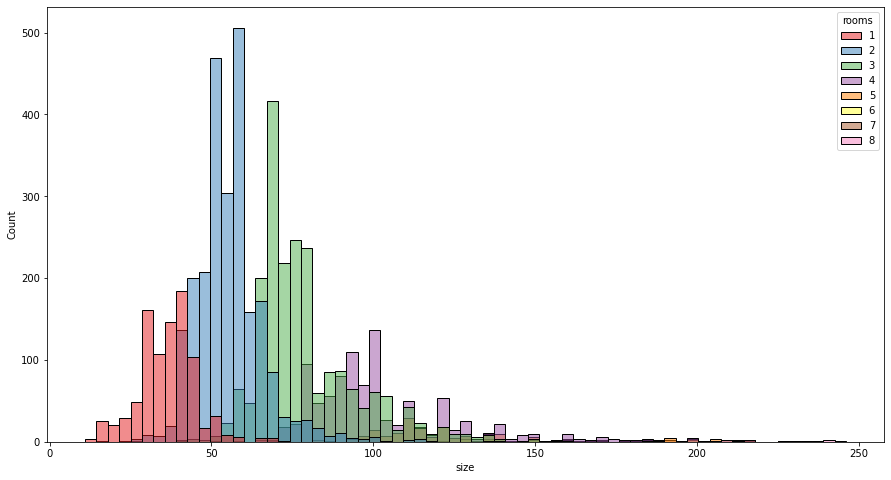

In [421]:
plt.figure(figsize=(15,8))
sbn.histplot(data=df[df['size']<250], 
             x = 'size', 
             hue='rooms',
             palette = 'Set1')
plt.show()

In [422]:
df = df[df['size']<250]

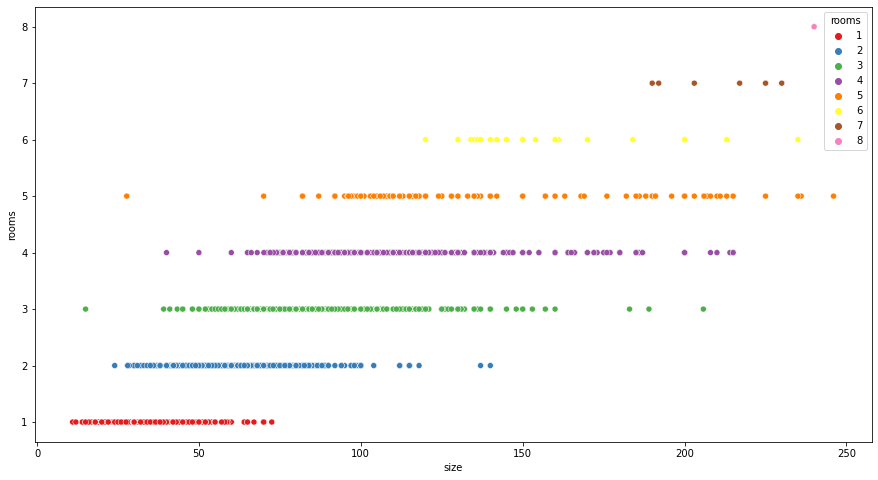

In [423]:
plt.figure(figsize=(15,8))
sbn.scatterplot(data=df, 
             x = 'size',
             y = 'rooms', 
             hue='rooms',
             palette = 'Set1')
plt.show()

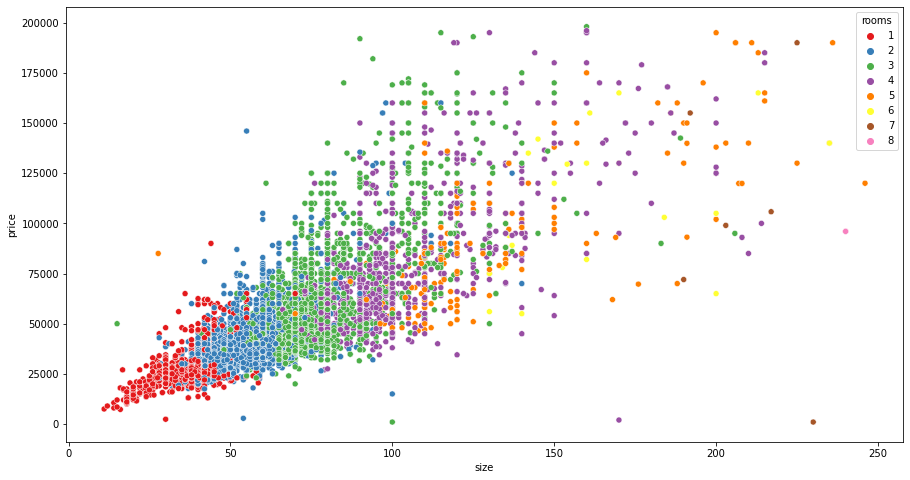

In [424]:
plt.figure(figsize=(15,8))
sbn.scatterplot(data=df, 
             x = 'size',
             y = 'price',
             hue='rooms',
             palette = 'Set1')
plt.show()

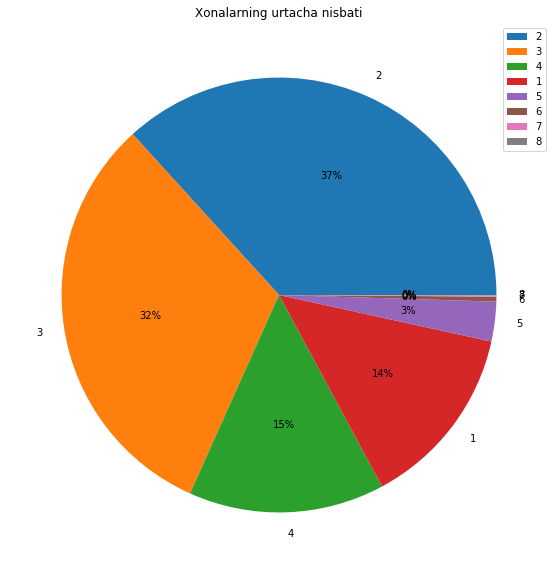

In [425]:
a = df.rooms.value_counts()
plt.figure(figsize=(10,10))
plt.pie(a, labels=a.index, autopct='%.0f%%')
plt.title('Xonalarning urtacha nisbati')
plt.legend()
plt.show()

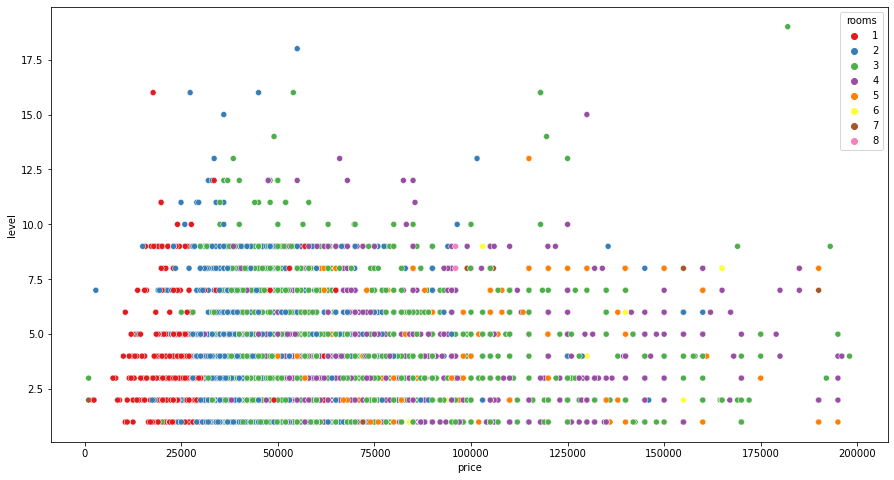

In [426]:
plt.figure(figsize=(15,8))
sbn.scatterplot(data=df, 
             x = 'price',
             y = 'level',
             hue='rooms',
             palette = 'Set1')
plt.show()

In [427]:
df_corr = df.corr()
df_corr

,rooms,size,level,max_levels,price
rooms,1.000000,0.824075,0.149886,0.182530,0.604017
size,0.824075,1.000000,0.204677,0.317392,0.781666
level,0.149886,0.204677,1.000000,0.600190,0.090369
max_levels,0.182530,0.317392,0.600190,1.000000,0.268753
price,0.604017,0.781666,0.090369,0.268753,1.000000


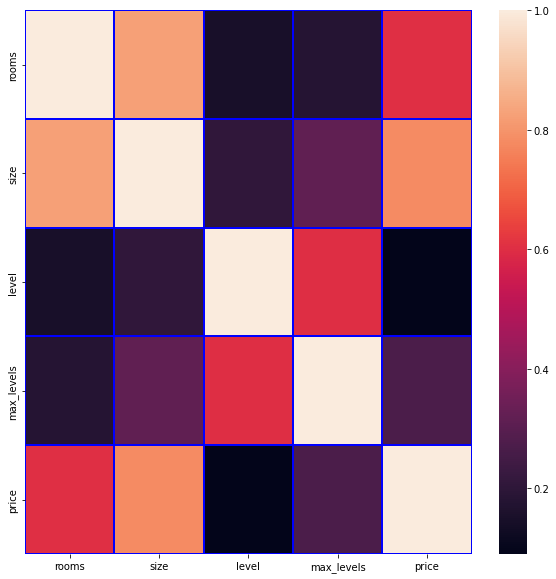

In [428]:
plt.figure(figsize=(10,10))
sbn.heatmap(df_corr, linewidths=1, linecolor='blue')
plt.show()

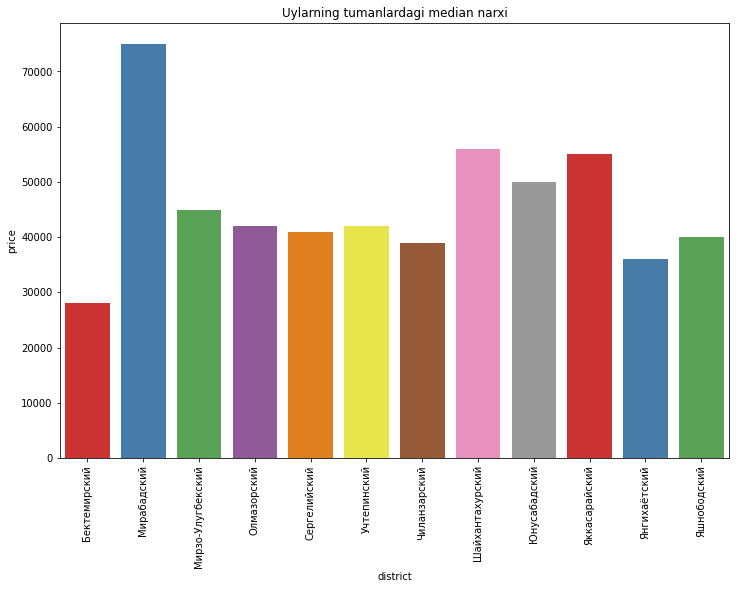

In [429]:
median = df.groupby(['district']).median()
plt.figure(figsize=(12,8))
sbn.barplot(data = median,
            x = median.index, 
            y = median['price'],
            palette = 'Set1')
plt.title("Uylarning tumanlardagi median narxi")
plt.xticks(rotation =90)
plt.show()

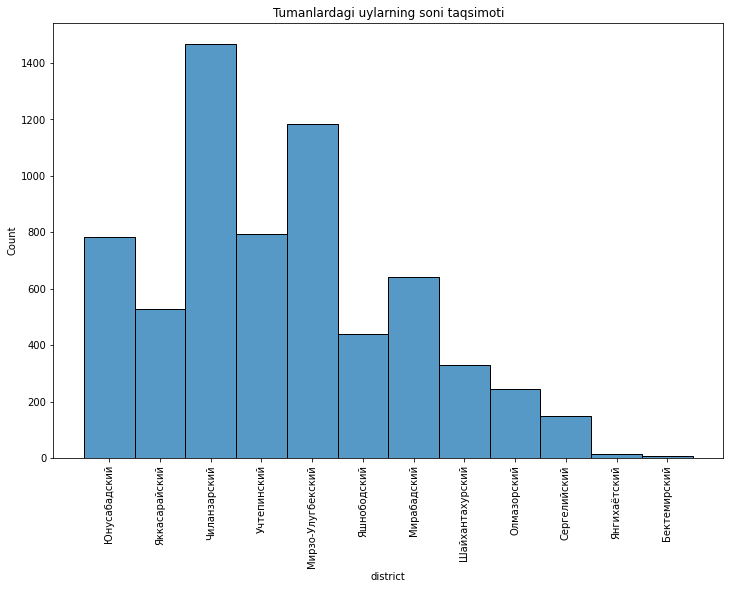

In [430]:
plt.figure(figsize=(12,8))
sbn.histplot(data = df,
            x = 'district'
            )
plt.title("Tumanlardagi uylarning soni taqsimoti")
plt.xticks(rotation =90)
plt.show()

In [431]:
    """'Accent', 'Accent_r', 'Blues', 'Blues_r', 'BrBG', 'BrBG_r', 'BuGn', 'BuGn_r', 'BuPu', 'BuPu_r', 'CMRmap', 'CMRmap_r', 'Dark2', 'Dark2_r', 'GnBu', 'GnBu_r', 'Greens', 'Greens_r', 'Greys', 'Greys_r', 'OrRd', 'OrRd_r', 'Oranges', 'Oranges_r', 'PRGn', 'PRGn_r', 'Paired', 'Paired_r', 'Pastel1', 'Pastel1_r', 'Pastel2', 'Pastel2_r', 'PiYG', 'PiYG_r', 'PuBu', 'PuBuGn', 'PuBuGn_r', 'PuBu_r', 'PuOr', 'PuOr_r', 'PuRd', 'PuRd_r', 'Purples', 'Purples_r', 'RdBu', 'RdBu_r', 'RdGy', 'RdGy_r', 'RdPu', 'RdPu_r', 'RdYlBu', 'RdYlBu_r', 'RdYlGn', 'RdYlGn_r', 'Reds', 'Reds_r', 'Set1', 'Set1_r', 'Set2', 'Set2_r', 'Set3', 'Set3_r', 'Spectral', 'Spectral_r', 'Wistia', 'Wistia_r', 'YlGn', 'YlGnBu', 'YlGnBu_r', 'YlGn_r', 'YlOrBr', 'YlOrBr_r', 'YlOrRd', 'YlOrRd_r', 'afmhot', 'afmhot_r', 'autumn', 'autumn_r', 'binary', 'binary_r', 'bone', 'bone_r', 'brg', 'brg_r', 'bwr', 'bwr_r', 'cividis', 'cividis_r', 'cool', 'cool_r', 'coolwarm', 'coolwarm_r', 'copper', 'copper_r', 'crest', 'crest_r', 'cubehelix', 'cubehelix_r', 'flag', 'flag_r', 'flare', 'flare_r', 'gist_earth', 'gist_earth_r', 'gist_gray', 'gist_gray_r', 'gist_heat', 'gist_heat_r', 'gist_ncar', 'gist_ncar_r', 'gist_rainbow', 'gist_rainbow_r', 'gist_stern', 'gist_stern_r', 'gist_yarg', 'gist_yarg_r', 'gnuplot', 'gnuplot2', 'gnuplot2_r', 'gnuplot_r', 'gray', 'gray_r', 'hot', 'hot_r', 'hsv', 'hsv_r', 'icefire', 'icefire_r', 'inferno', 'inferno_r', 'jet', 'jet_r"""

"'Accent', 'Accent_r', 'Blues', 'Blues_r', 'BrBG', 'BrBG_r', 'BuGn', 'BuGn_r', 'BuPu', 'BuPu_r', 'CMRmap', 'CMRmap_r', 'Dark2', 'Dark2_r', 'GnBu', 'GnBu_r', 'Greens', 'Greens_r', 'Greys', 'Greys_r', 'OrRd', 'OrRd_r', 'Oranges', 'Oranges_r', 'PRGn', 'PRGn_r', 'Paired', 'Paired_r', 'Pastel1', 'Pastel1_r', 'Pastel2', 'Pastel2_r', 'PiYG', 'PiYG_r', 'PuBu', 'PuBuGn', 'PuBuGn_r', 'PuBu_r', 'PuOr', 'PuOr_r', 'PuRd', 'PuRd_r', 'Purples', 'Purples_r', 'RdBu', 'RdBu_r', 'RdGy', 'RdGy_r', 'RdPu', 'RdPu_r', 'RdYlBu', 'RdYlBu_r', 'RdYlGn', 'RdYlGn_r', 'Reds', 'Reds_r', 'Set1', 'Set1_r', 'Set2', 'Set2_r', 'Set3', 'Set3_r', 'Spectral', 'Spectral_r', 'Wistia', 'Wistia_r', 'YlGn', 'YlGnBu', 'YlGnBu_r', 'YlGn_r', 'YlOrBr', 'YlOrBr_r', 'YlOrRd', 'YlOrRd_r', 'afmhot', 'afmhot_r', 'autumn', 'autumn_r', 'binary', 'binary_r', 'bone', 'bone_r', 'brg', 'brg_r', 'bwr', 'bwr_r', 'cividis', 'cividis_r', 'cool', 'cool_r', 'coolwarm', 'coolwarm_r', 'copper', 'copper_r', 'crest', 'crest_r', 'cubehelix', 'cubehelix_r

#ML

In [432]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

In [433]:
train_set, test_set = train_test_split(df, test_size=0.2,random_state=27)

In [440]:
num_col = ['rooms','size', 'level','max_levels']
text_col = ['district']
full_pipeline = ColumnTransformer([
                                  ('num', StandardScaler(), num_col),
                                  ('text', OneHotEncoder(),text_col)
])

In [441]:
X_prepared = full_pipeline.fit_transform(train_set)
X_prepared[1,:].shape

(16,)

In [442]:
y_train = train_set['price'].copy()

#Logistik Regression

In [443]:
from sklearn.linear_model import LinearRegression
LR_model = LinearRegression()
LR_model.fit(X_prepared, y_train)

LinearRegression()

In [444]:
X_test_prepared = full_pipeline.fit_transform(test_set)
y_test = test_set['price']

In [445]:
test_predict = LR_model.predict(X_test_prepared)

In [446]:
pd.DataFrame({'Bashorat':test_predict, 'Asl_qiymat':y_test})

,Bashorat,Asl_qiymat
1056,31682.964748,34000.0
6051,43182.994626,36000.0
2011,27717.429631,25500.0
3786,37567.187747,33500.0
2213,65122.769726,47000.0
...,...,...
2319,52682.182016,53500.0
1386,36437.360012,37000.0
2384,27773.539875,28500.0
2963,43988.129833,36000.0


In [449]:
from sklearn.metrics import mean_absolute_error
mse = mean_absolute_error(y_test,test_predict)
mse

11341.193398188647

#RandomForestRegressor

In [453]:
from sklearn.ensemble import RandomForestRegressor
RF_model = RandomForestRegressor()
RF_model.fit(X_prepared, y_train)

RandomForestRegressor()

In [456]:
test_predict = RF_model.predict(X_test_prepared)
pd.DataFrame({'Bashorat':test_predict, 'Asl_qiymat':y_test})

,Bashorat,Asl_qiymat
1056,30214.760000,34000.0
6051,37715.010000,36000.0
2011,25572.416667,25500.0
3786,39269.950833,33500.0
2213,66953.180000,47000.0
...,...,...
2319,52946.546667,53500.0
1386,31893.566667,37000.0
2384,26240.574000,28500.0
2963,38754.856667,36000.0


In [457]:
from sklearn.metrics import mean_absolute_error
mse = mean_absolute_error(y_test,test_predict)
mse

10568.47383998289

#Modelni saqlab olamiz

In [458]:
import pickle
filename = "/content/drive/MyDrive/ANDROMEDA_Drive/RepeateDataScience/ML/LR_model.pkl"
with open(filename, 'wb') as file:
  pickle.dump(LR_model, file)

In [459]:
#RandomForest modelini ham saqlab olamiz
import pickle
filename = "/content/drive/MyDrive/ANDROMEDA_Drive/RepeateDataScience/ML/RF_model.pkl"
with open(filename, 'wb') as file:
  pickle.dump(RF_model, file)